In [ ]:
#Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix


In [4]:
df=pd.read_csv('data.csv' ,encoding='unicode_escape')
 # Reading the dataset

In [5]:
df.head()
 # Loading the dataset

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [6]:
df.shape
# As we can see that there are 4,35,742 rows and 13 columns in the dataset

(97423, 13)

In [7]:
df.info()
 # Checking the over all information on the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97423 entries, 0 to 97422
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     60753 non-null  float64
 1   sampling_date                97423 non-null  object 
 2   state                        97423 non-null  object 
 3   location                     97423 non-null  object 
 4   agency                       59221 non-null  object 
 5   type                         95794 non-null  object 
 6   so2                          89929 non-null  float64
 7   no2                          94376 non-null  float64
 8   rspm                         88656 non-null  float64
 9   spm                          50489 non-null  float64
 10  location_monitoring_station  90049 non-null  object 
 11  pm2_5                        1848 non-null   float64
 12  date                         97422 non-null  object 
dtypes: float64(6), o

In [8]:
df.isnull().sum()
 # There are a lot of missing values present in the dataset

stn_code                       36670
sampling_date                      0
state                              0
location                           0
agency                         38202
type                            1629
so2                             7494
no2                             3047
rspm                            8767
spm                            46934
location_monitoring_station     7374
pm2_5                          95575
date                               1
dtype: int64

In [9]:
df.describe()
 # Checking the descriptive stats of the numeric values present in the data like mean, standard deviation, min values and max value present in the data


,stn_code,so2,no2,rspm,spm,pm2_5
count,60753.000000,89929.000000,94376.000000,88656.000000,50489.000000,1848.000000
mean,383.033019,9.666180,23.268016,99.148675,215.214880,34.651136
std,220.903480,8.782058,16.194474,64.431394,134.409625,37.800496
min,21.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,193.000000,5.000000,13.300000,60.000000,135.000000,14.000000
50%,389.000000,7.000000,19.000000,85.000000,190.000000,21.000000
75%,581.000000,12.000000,28.400000,119.000000,268.000000,31.050000
max,788.000000,228.000000,334.900000,892.000000,1885.000000,318.000000


In [10]:
df.nunique()
# These are all the unique values present in the dataframe

stn_code                        176
sampling_date                  5007
state                            11
location                         87
agency                           18
type                              8
so2                            1074
no2                            1413
rspm                           1373
spm                            2163
location_monitoring_station     238
pm2_5                           245
date                           4847
dtype: int64

In [11]:
df.columns
#These are all the columns present in the dataset.

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

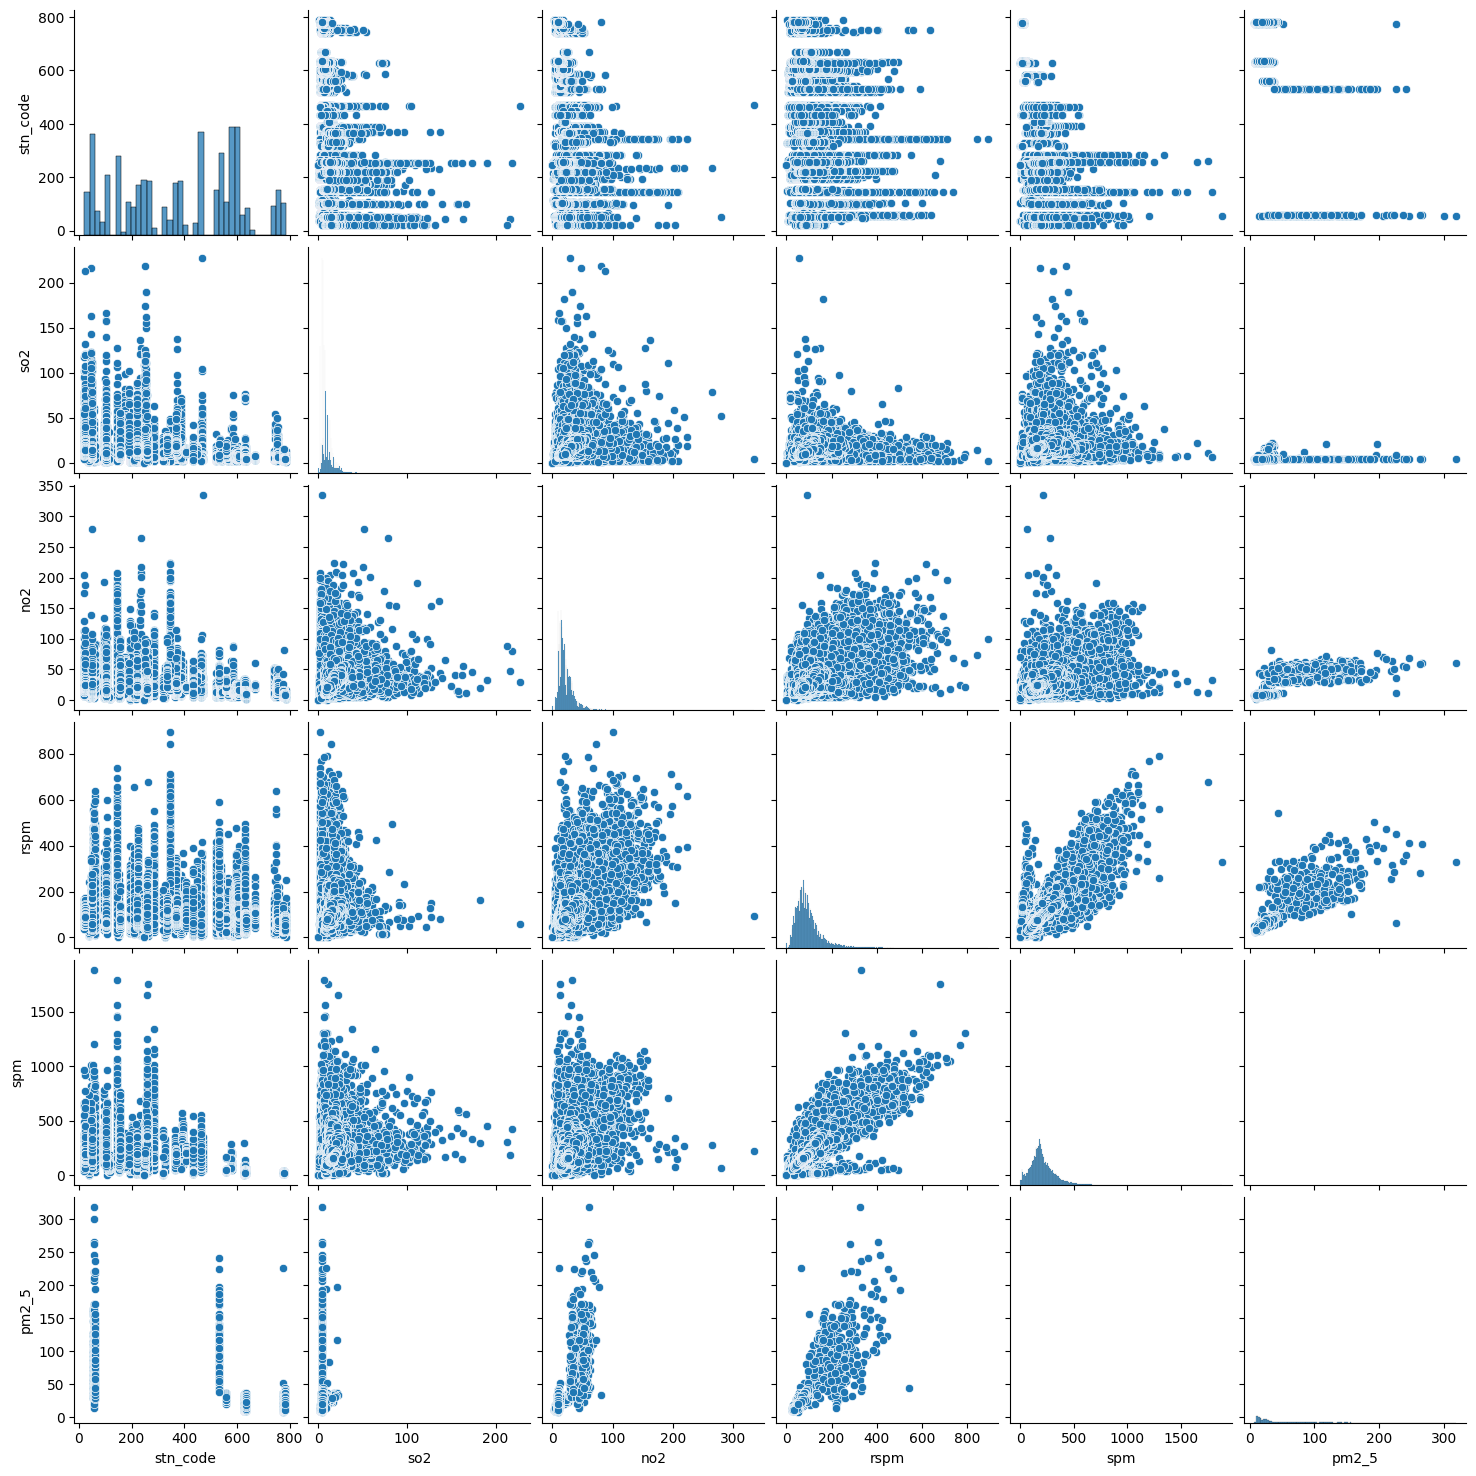

In [12]:
sns.pairplot(data=df)

In [13]:
df['state'].value_counts()
#Viewing the count of values present in the state column

Andhra Pradesh          26368
Assam                   19361
Gujarat                 16805
Delhi                    8551
Chandigarh               8520
Chhattisgarh             7831
Goa                      6206
Bihar                    2275
Daman & Diu               782
Dadra & Nagar Haveli      634
Arunachal Pradesh          90
Name: state, dtype: int64

[]

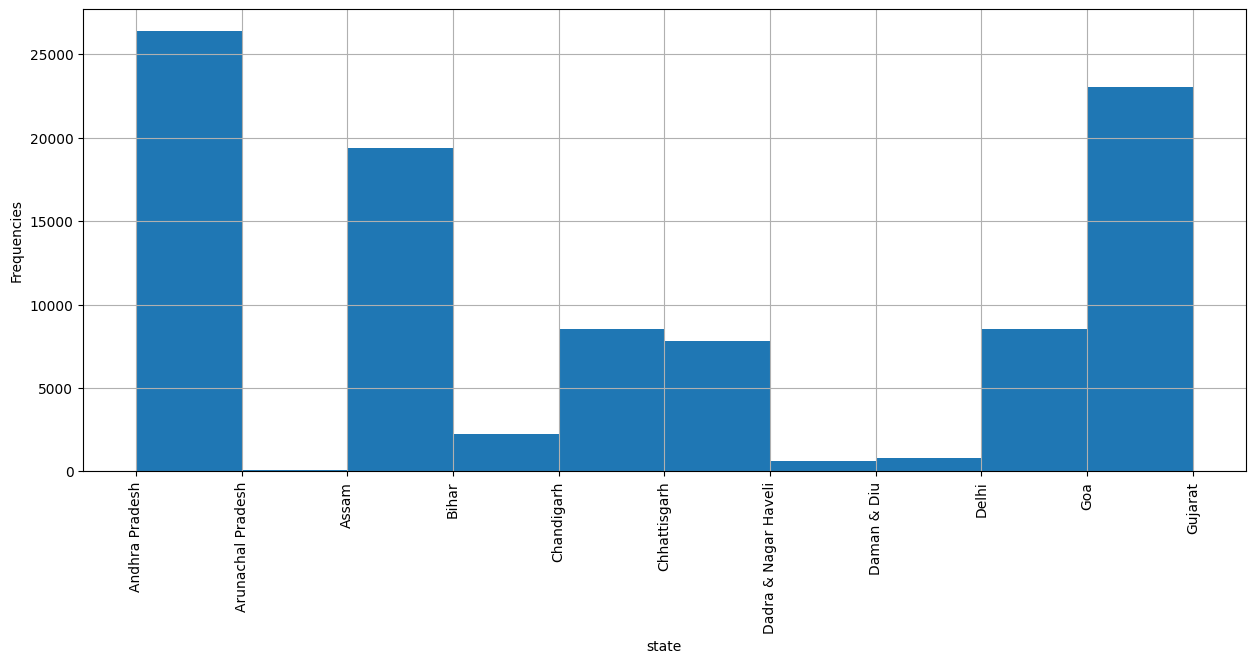

In [14]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()

# The visualization shows us the count of states present in the dataset

In [15]:
df['type'].value_counts()
# Viewing the count of values present in the type column

Residential, Rural and other Areas    42740
Residential and others                25922
Industrial Area                       14179
Industrial Areas                       9466
Sensitive Area                         2083
Sensitive Areas                        1282
Industrial                               64
Residential                              58
Name: type, dtype: int64

[]

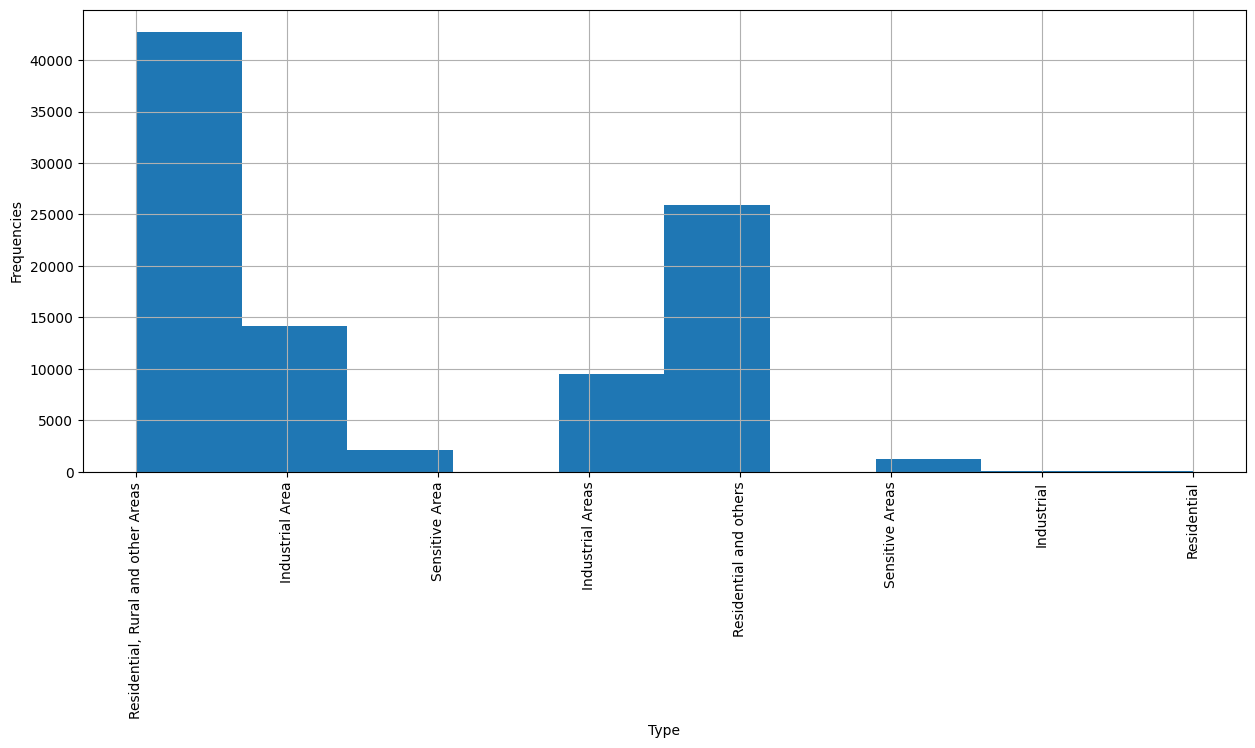

In [16]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()

# The visualization shows us the count of Types present in the dataset.

In [ ]:
df['agency'].value_counts()
#Viewing the counts of values present in the agency column

[]

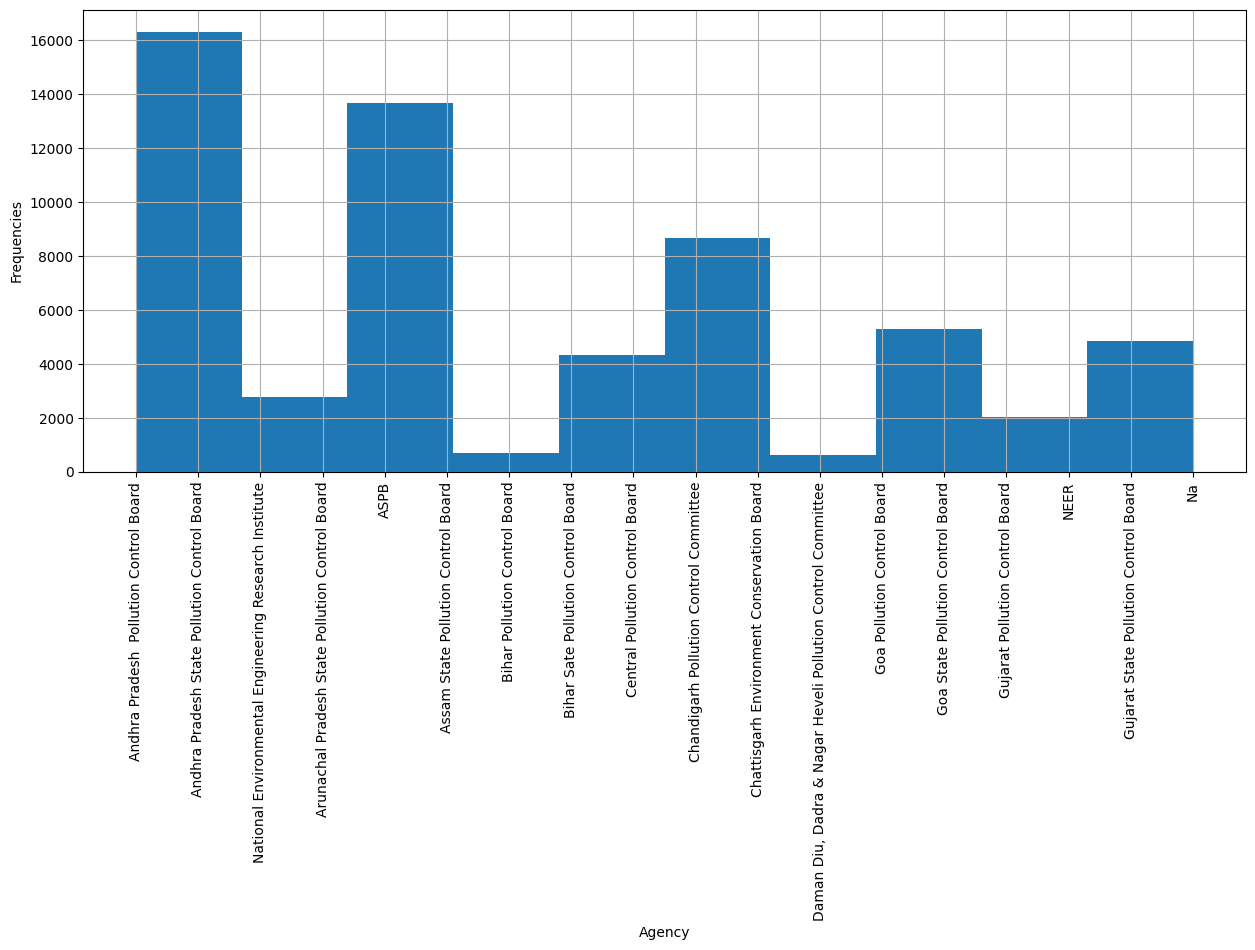

In [23]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()

# The visualization shows us the count of Agency present in the dataset.

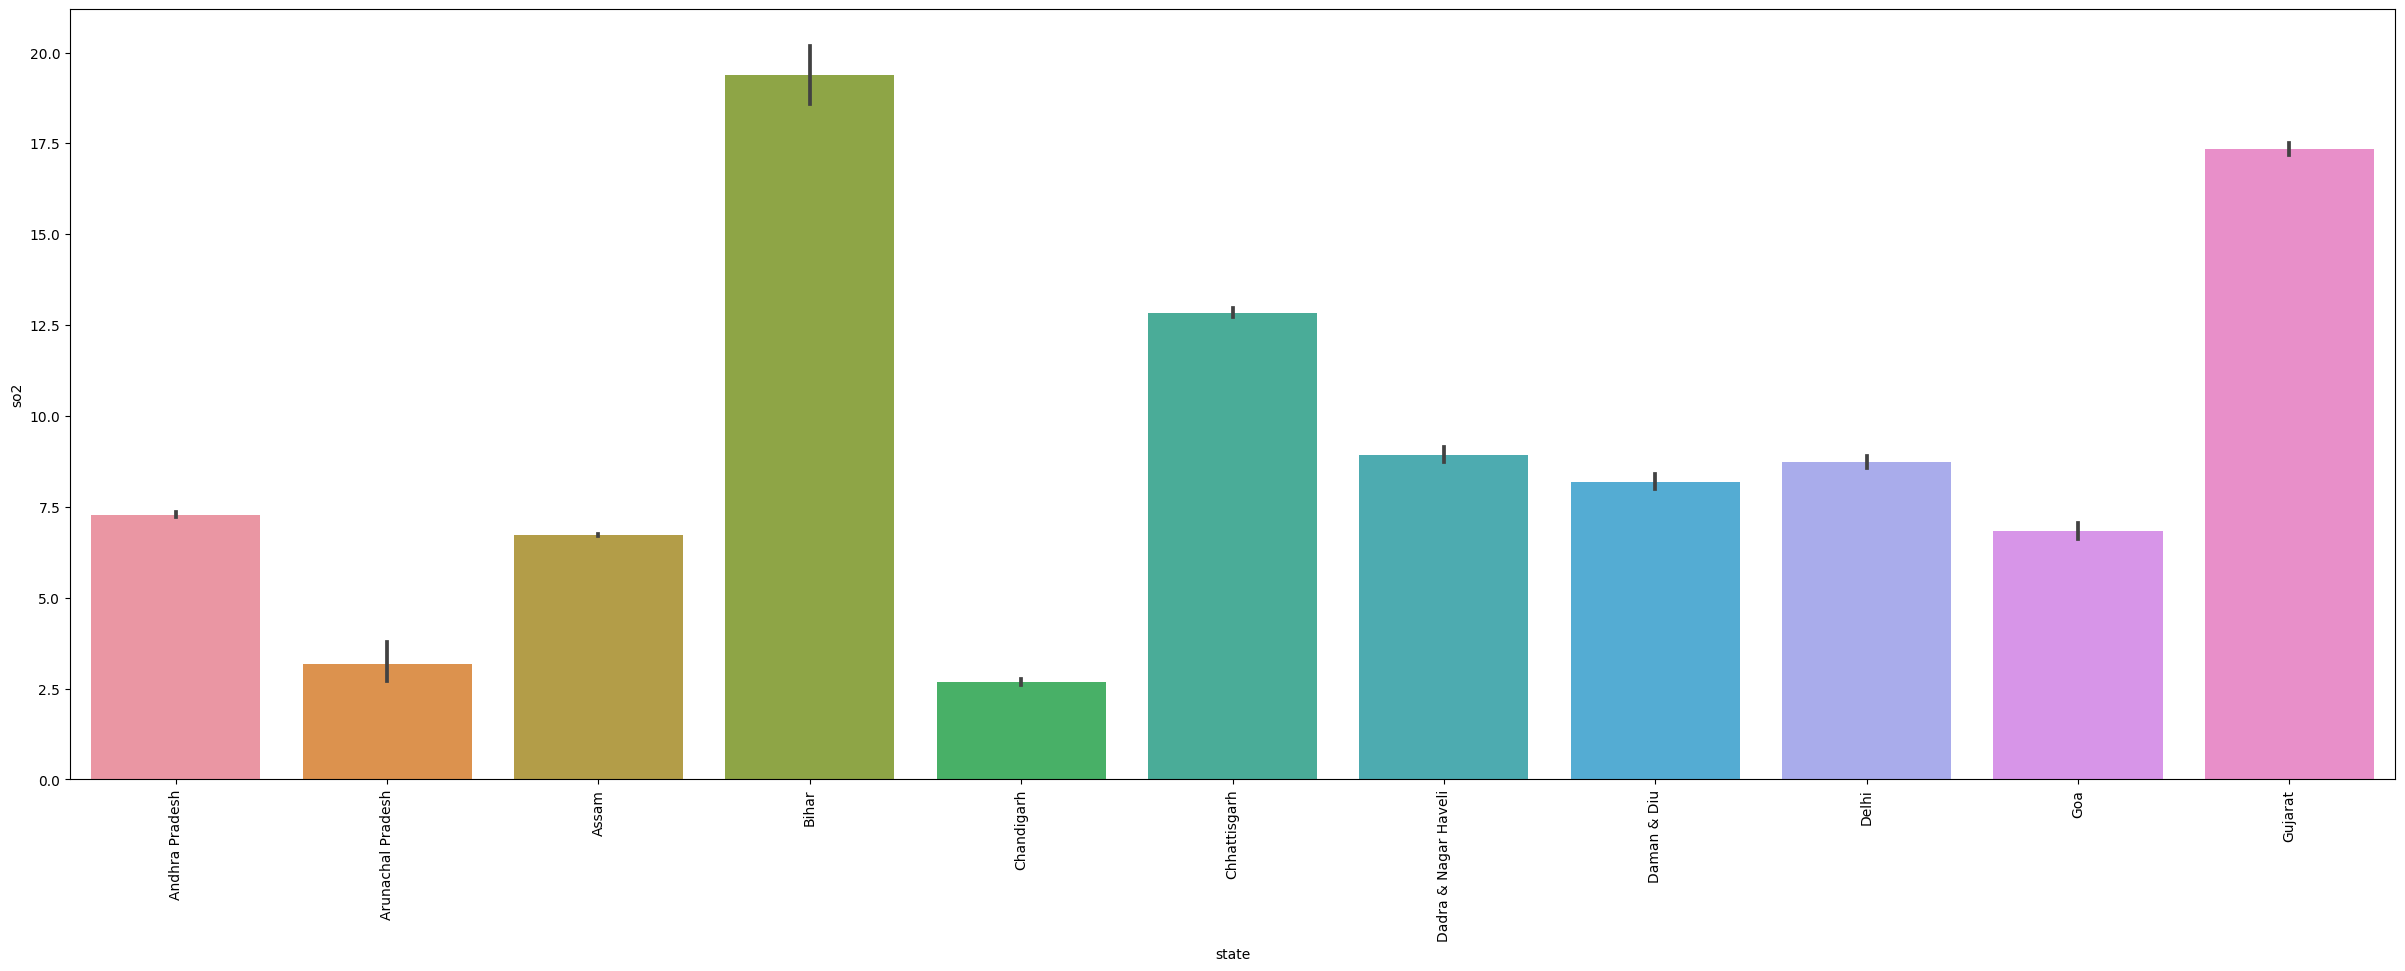

In [29]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state' ,y='so2',data=df);

# This visualization shows the name of the state having higher so2 levels in the air which is Uttaranchal followed by Uttarakhand


In [25]:
plt.rcParams[ 'figure.figsize' ]=(30,10)

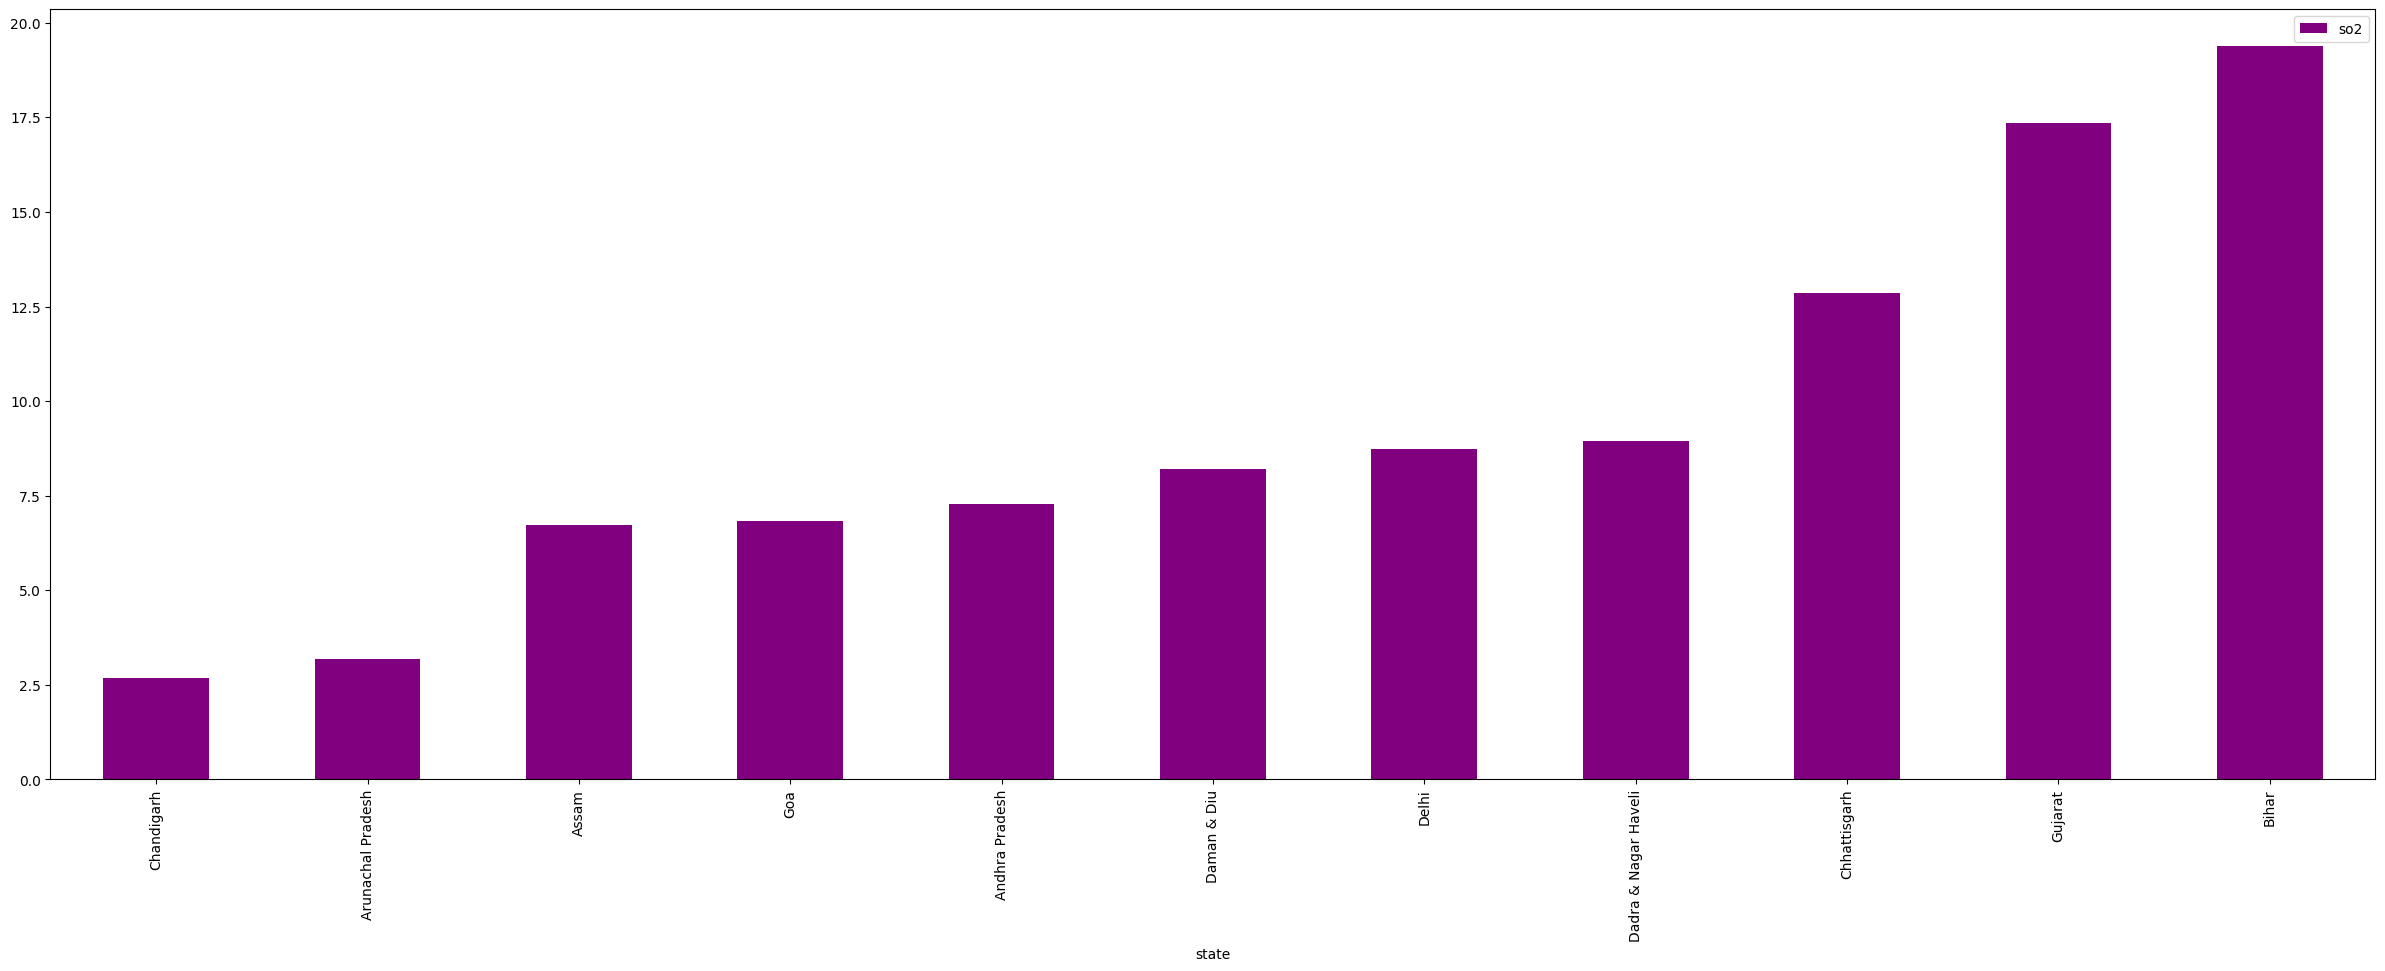

In [26]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their so2 leve!

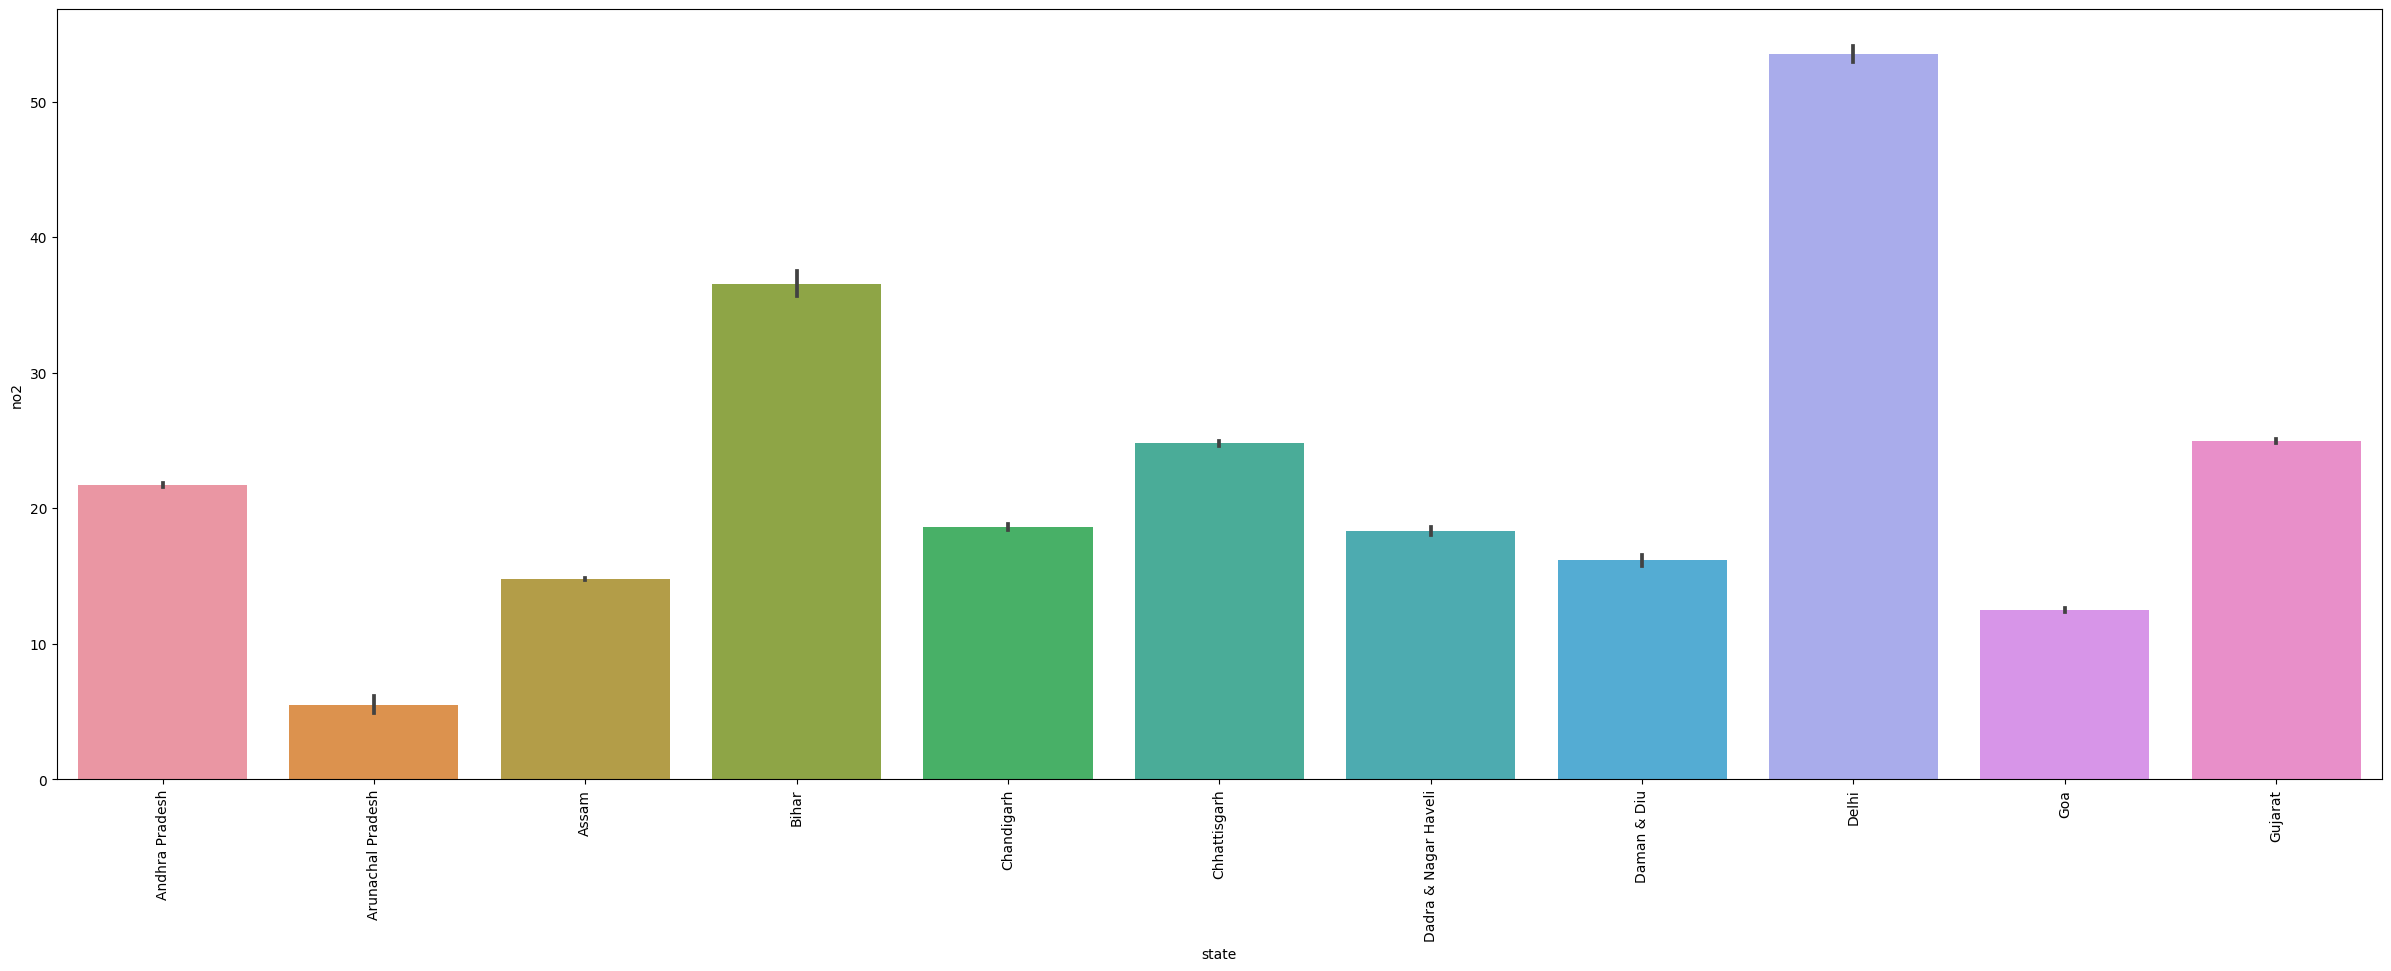

In [28]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state' , y='no2',data=df);

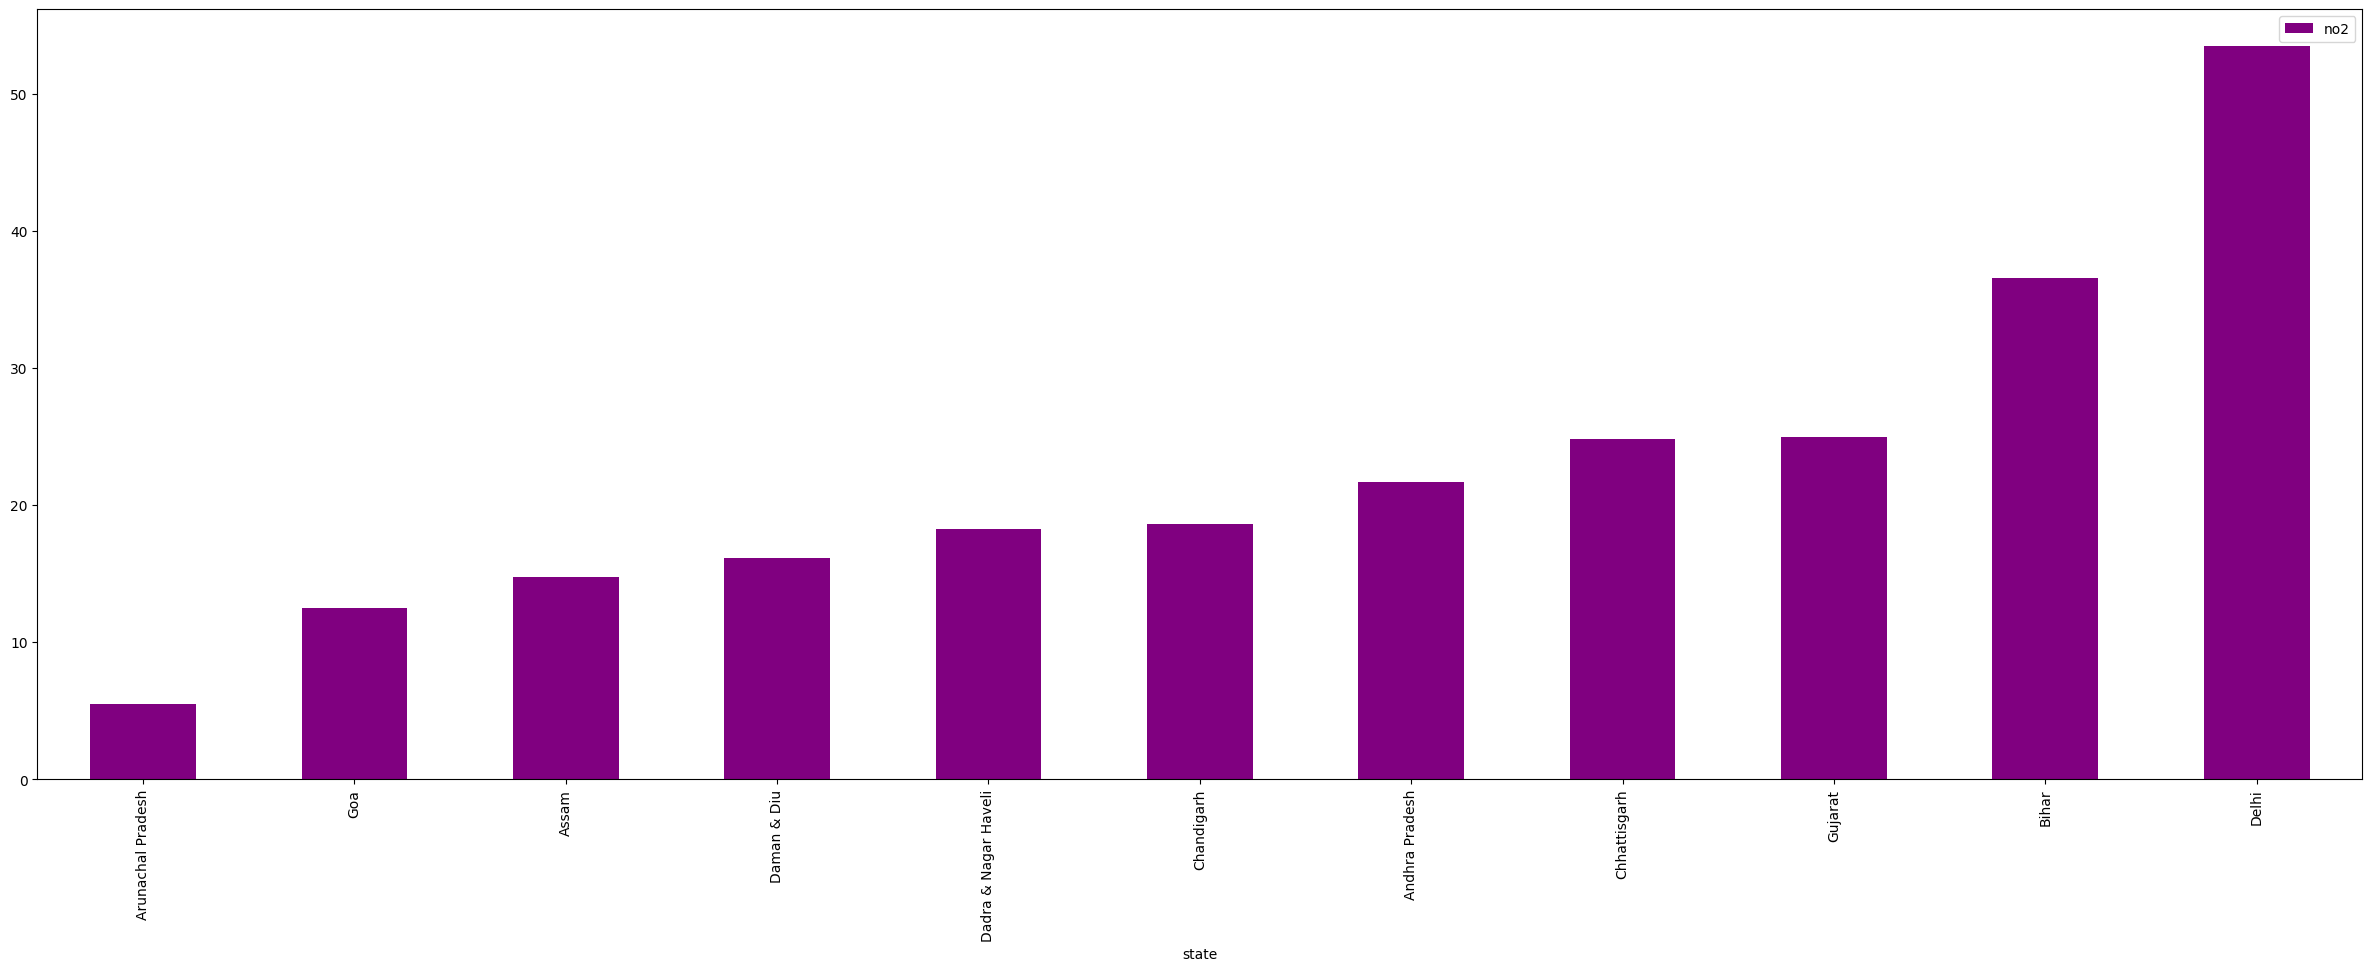

In [31]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()

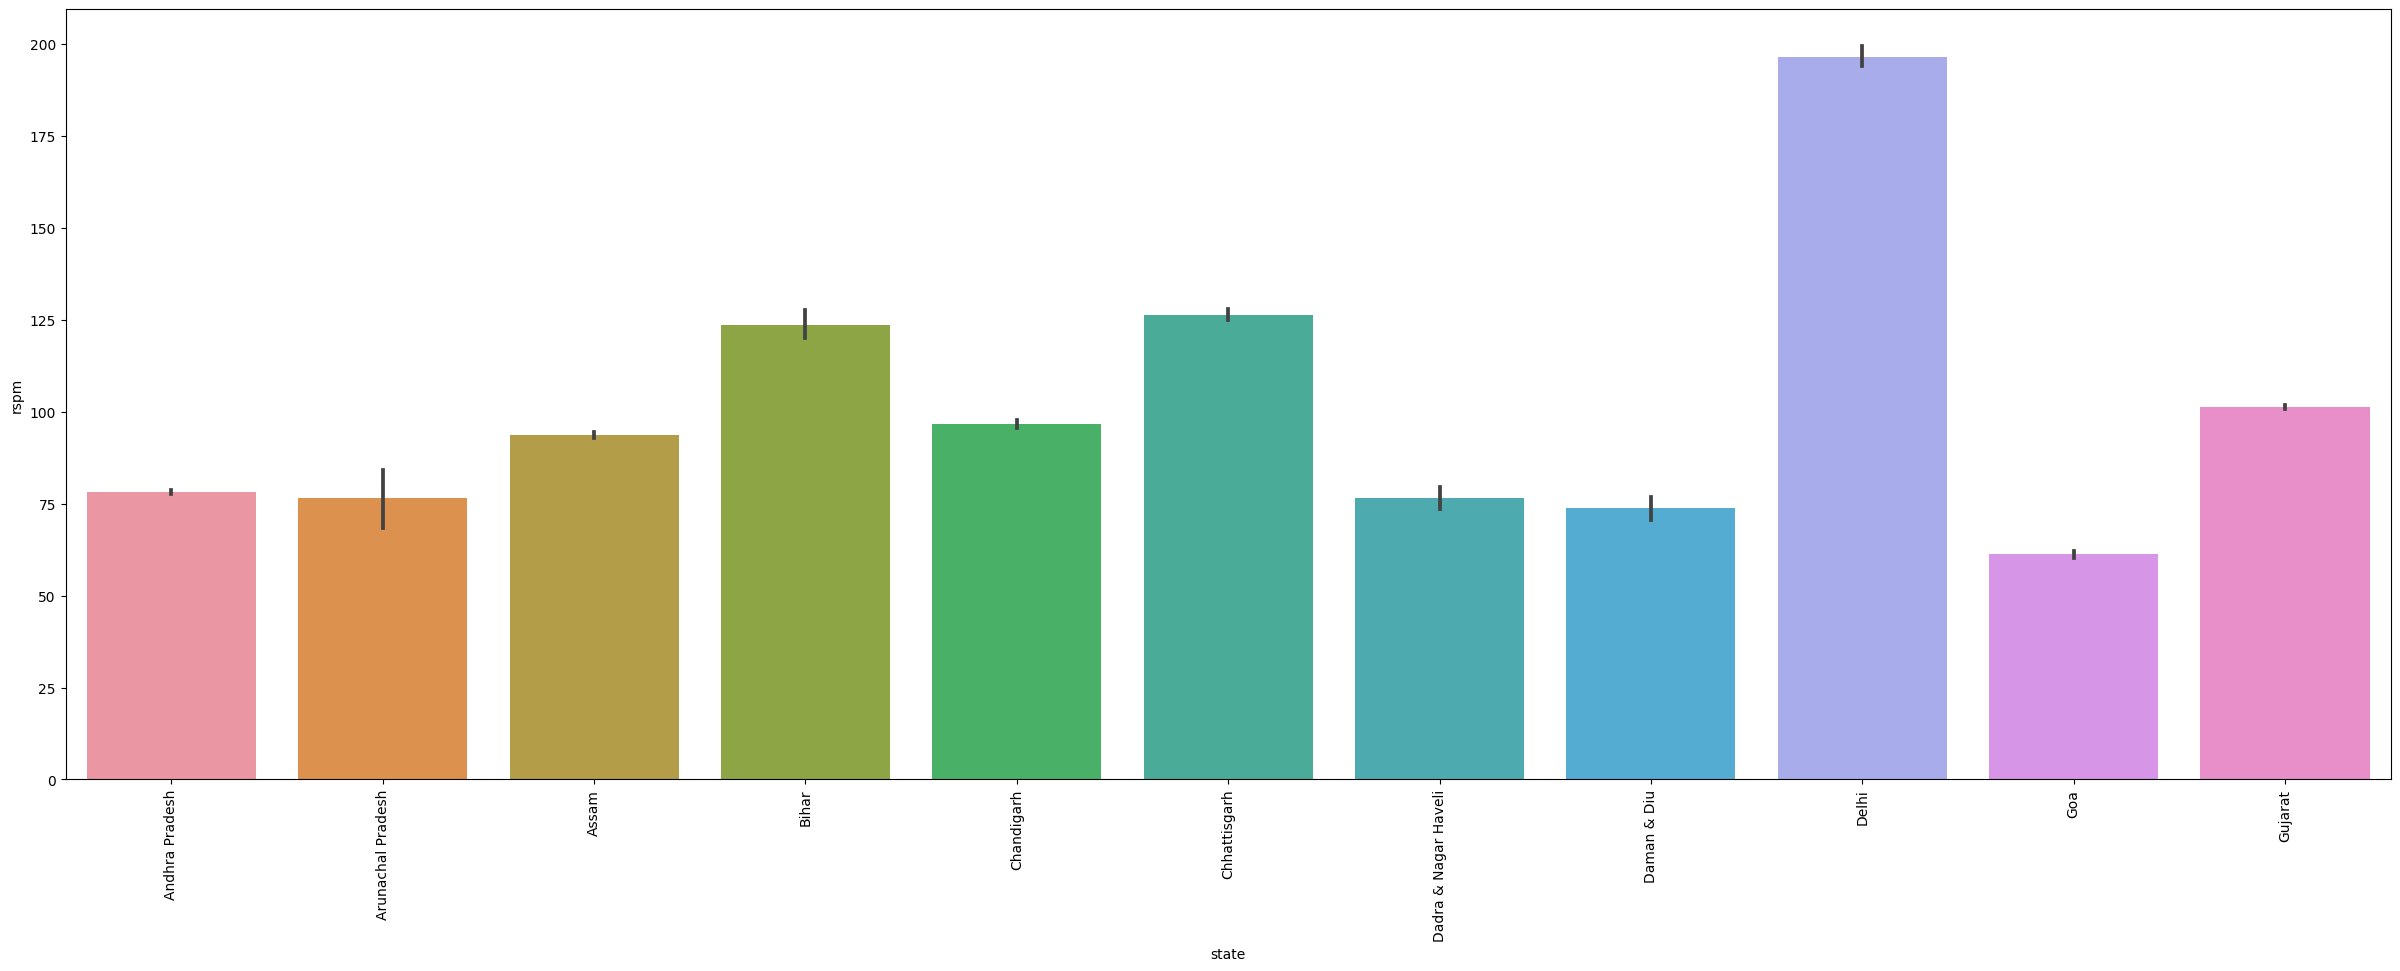

In [32]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state' , y='rspm',data=df);

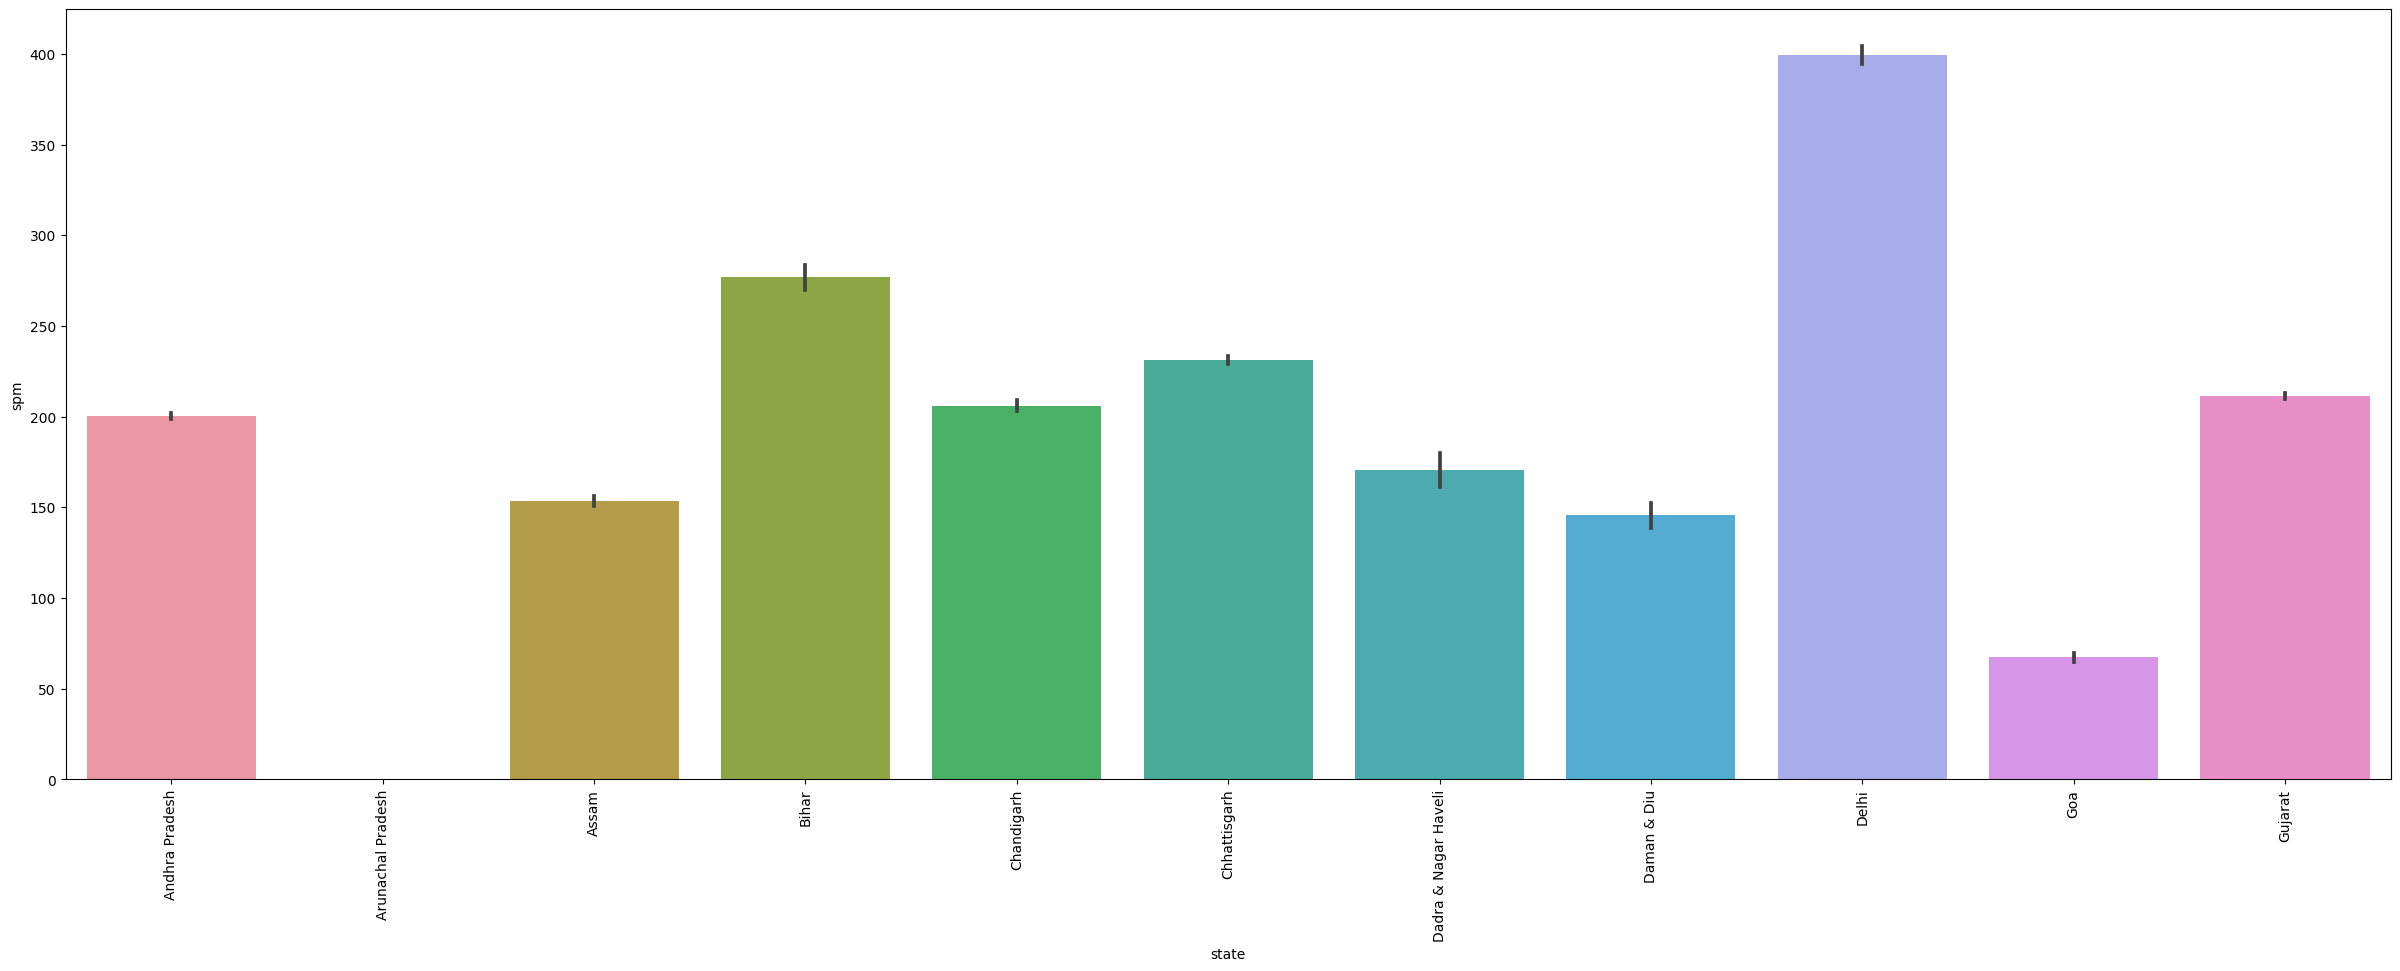

In [33]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state' , y='spm',data=df);

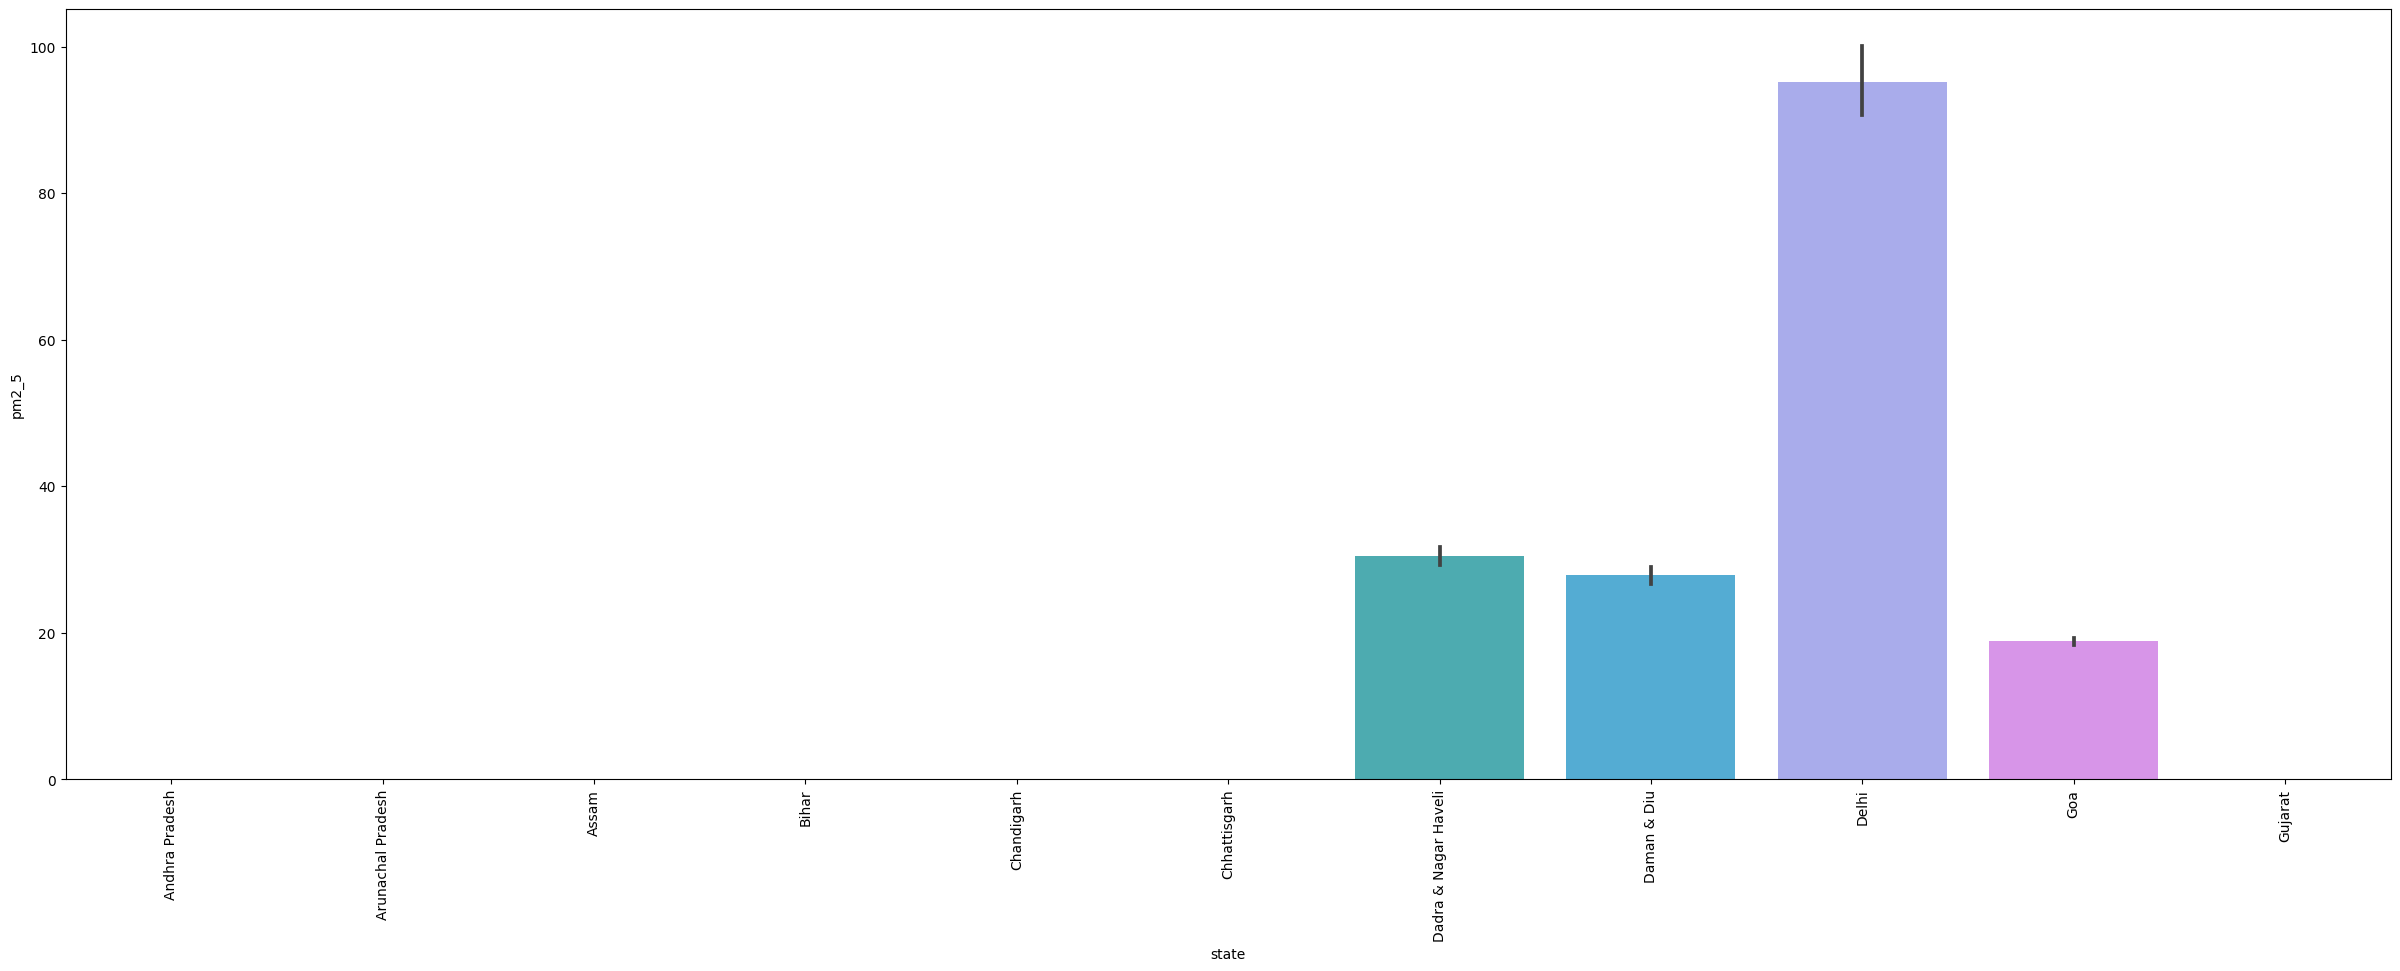

In [34]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state' , y='pm2_5',data=df);

Checking Null values

In [35]:
nullvalues = df.isnull().sum().sort_values(ascending=False)

In [36]:
nullvalues

pm2_5                          95575
spm                            46934
agency                         38202
stn_code                       36670
rspm                            8767
so2                             7494
location_monitoring_station     7374
no2                             3047
type                            1629
date                               1
sampling_date                      0
state                              0
location                           0
dtype: int64

In [40]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [41]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])

In [42]:
missing_data_with_percentage

,Total,Percent
pm2_5,95575,98.103117
spm,46934,48.175482
agency,38202,39.212506
stn_code,36670,37.639982
rspm,8767,8.998902
so2,7494,7.692229
location_monitoring_station,7374,7.569055
no2,3047,3.127598
type,1629,1.672090
date,1,0.001026


In [43]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [44]:
df.isnull().sum()

state           0
location        0
type         1629
so2          7494
no2          3047
rspm         8767
spm         46934
pm2_5       95575
dtype: int64

In [45]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
97418,Gujarat,Ahmedabad,"Residential, Rural and other Areas",11.0,21.0,83.0,NaN,NaN
97419,Gujarat,Ahmedabad,"Residential, Rural and other Areas",10.0,19.0,74.0,NaN,NaN
97420,Gujarat,Ahmedabad,"Residential, Rural and other Areas",9.0,16.0,71.0,NaN,NaN
97421,Gujarat,Ahmedabad,"Residential, Rural and other Areas",10.0,21.0,82.0,NaN,NaN


In [47]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [48]:
df.fillna(0, inplace=True)

In [49]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [50]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
97418,Gujarat,Ahmedabad,"Residential, Rural and other Areas",11.0,21.0,83.0,0.0,0.0
97419,Gujarat,Ahmedabad,"Residential, Rural and other Areas",10.0,19.0,74.0,0.0,0.0
97420,Gujarat,Ahmedabad,"Residential, Rural and other Areas",9.0,16.0,71.0,0.0,0.0
97421,Gujarat,Ahmedabad,"Residential, Rural and other Areas",10.0,21.0,82.0,0.0,0.0


Calculating air quality index for SO2
(Correction to be done 32:00)


In [51]:
## SO2 Sub-Index calculation
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si

df['SOi'] = df['so2'].apply(cal_SOi)
data=df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [52]:
## NO2 calculation
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni

df['Noi'] = df['no2'].apply(cal_Noi)
data=df[['no2','Noi']]
data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [53]:
## PM2.5 Sub-Index calculation
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['rpi'] = df['rspm'].apply(cal_RSPMI)
data=df[['rspm','rpi']]
data.head()


,rspm,rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [54]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm
    if(spm<50 and spm<=100):
     spi=spm
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)
    elif(spm>350 and spm<=450):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi
df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()


,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [57]:
def cal_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['rpi'],x['SPMi']),axis=1)
data = df[['state','SOi','Noi','rpi','SPMi','AQI']]
data.head()


,state,SOi,Noi,rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [58]:
def AQI_Range(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"

df['AQI_Range'] = df['AQI'].apply(AQI_Range)
df.head()


,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [59]:
df['AQI_Range'].value_counts()


Good            50629
Moderate        30026
Poor             8810
Severe           3116
Very Poor        2888
Satisfactory     1954
Name: AQI_Range, dtype: int64

In [62]:
X = df[['SOi','Noi','rpi','SPMi']]
Y = df['AQI']
X.head()

,SOi,Noi,rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [63]:
Y.head()

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(77938, 4) (19485, 4) (77938,) (19485,)


Linear Regression

In [65]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [66]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [69]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE training data = ",str(RMSE_train))
print("RMSE test data = ",str(RMSE_test))
print('-'*50)
print('RSqaured value on train:' ,model.score(X_train,Y_train))
print('RSqaured value on test:' ,model.score(X_test,Y_test))

RMSE training data =  16.069010956935312
RMSE test data =  15.757689360872037
--------------------------------------------------
RSqaured value on train: 0.9845171407093051
RSqaured value on test: 0.9848249625854169


Decision tree Regressor

In [70]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [71]:
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)

In [73]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE training data = ",str(RMSE_train))
print("RMSE test data = ",str(RMSE_test))
print('-'*50)
print('RSqaured value on train:' ,DT.score(X_train,Y_train))
print('RSqaured value on test:' ,DT.score(X_test,Y_test))

RMSE training data =  1.090567707362144e-13
RMSE test data =  1.0176995546119494
--------------------------------------------------
RSqaured value on train: 1.0
RSqaured value on test: 0.9999367028917048


Random Forest Regressor

In [74]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [75]:
train_preds1=RF.predict(X_train)
test_preds1=RF.predict(X_test)

In [76]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE training data = ",str(RMSE_train))
print("RMSE test data = ",str(RMSE_test))
print('-'*50)
print('RSqaured value on train:' ,RF.score(X_train,Y_train))
print('RSqaured value on test:' ,RF.score(X_test,Y_test))

RMSE training data =  0.6480826857203061
RMSE test data =  0.6517918512960145
--------------------------------------------------
RSqaured value on train: 0.9999748154780814
RSqaured value on test: 0.9999740365408183


Classification Algorithm for AQI range

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [81]:
X2 = df[['SOi','Noi','rpi','SPMi']]
Y2 = df['AQI_Range']

In [82]:
X_train2,X_test2,Y_train2,Y_test2=train_test_split(X2,Y2,test_size=0.33,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(77938, 4) (19485, 4) (77938,) (19485,)


In [84]:
log_reg = LogisticRegression().fit(X_train2,Y_train2)
train_preds2 = log_reg.predict(X_train2)
print("Model accuracy on train is=",accuracy_score(Y_train2,train_preds2))

test_preds2 = log_reg.predict(X_test2)
print("Model accuracy on test is=",accuracy_score(Y_test2,test_preds2))

print('Kappa score in=', metrics.cohen_kappa_score(Y_test2,test_preds2))

Model accuracy on train is= 0.7960106016270126
Model accuracy on test is= 0.7996578538102644
Kappa score in= 0.6665430217499144


In [86]:
log_reg.predict([[727,327.55,78.2,100]])

array(['Good'], dtype=object)

In [87]:
log_reg.predict([[2.7,45,35.16,23]])

array(['Moderate'], dtype=object)

In [90]:
log_reg.predict([[10,2.8,82,20]])

array(['Good'], dtype=object)

In [91]:
log_reg.predict([[2,45.8,37,32]])

array(['Moderate'], dtype=object)

Decision Tree classifier

In [93]:
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)
train_preds3 = DT2.predict(X_train2)
print("Model accuracy on train is=",accuracy_score(Y_train2,train_preds3))

test_preds3 = DT2.predict(X_test2)
print("Model accuracy on test is=",accuracy_score(Y_test2,test_preds3))
print('-'*50)

print('Kappa score in=', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is= 1.0
Model accuracy on test is= 0.9999377916018662
--------------------------------------------------
Kappa score in= 0.9999002200837698


Random Forest Classifier

In [94]:
RF = RandomForestClassifier().fit(X_train2,Y_train2)
train_preds4 = RF.predict(X_train2)
print("Model accuracy on train is=",accuracy_score(Y_train2,train_preds4))

test_preds4 = RF.predict(X_test2)
print("Model accuracy on test is=",accuracy_score(Y_test2,test_preds4))

print('Kappa score in=', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is= 1.0
Model accuracy on test is= 0.9999066874027994
Kappa score in= 0.9998503263829913


K Nearest Neighbors

In [97]:
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
train_preds5 = log_reg.predict(X_train2)
print("Model accuracy on train is=",accuracy_score(Y_train2,train_preds5))

test_preds5 = log_reg.predict(X_test2)
print("Model accuracy on test is=",accuracy_score(Y_test2,test_preds5))

print('Kappa score in=', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is= 0.7960106016270126
Model accuracy on test is= 0.7996578538102644
Kappa score in= 0.6665430217499144


In [99]:
KNN.predict([[7.4,47,78.182,100]])

array(['Moderate'], dtype=object)